## This notebook shows how the superdroplet datasets on the Derecho scratch can be accessed

In [3]:
# Using the NPL 2024a kernel
import numpy as np
import xarray as xr
import os.path
import os
import pandas as pd

from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

## Environmental variable file
This first filetype includes the time evolution of the simulated cloud in the 3D domain (the microphysical evolution of the cloud and its interaction with the dynamic environmnent)

In [5]:
# filepaths for 3d variables
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/'
fn = 'cm1out.nc'

In [6]:
newncfilepath = os.path.join(dirpath,fn)
print(newncfilepath)

/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/cm1out.nc


In [7]:
nc=xr.open_dataset(newncfilepath)

In [9]:
# check what variables are available in this file
nc

<xarray.Dataset>
Dimensions:   (one: 1, time: 41, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nk: 140, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:00:00.000488281
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    tke       (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

Definitions of the output variables specific for ice deposition simulations are given below:
- out8: mean size in um (a)
- out9: mean size in um (c)
- out10: ice number mixing ratio (#/kg)
- out11: mean settling velocity (m/s)
- out12: mean ice density (kg/m^3)
- out13: standard deviation of size in um (a_std)
- out14: standard deviation of size in um (c_std)
- deactrat: mean deposition/sublimation rate (kg/kg/s)

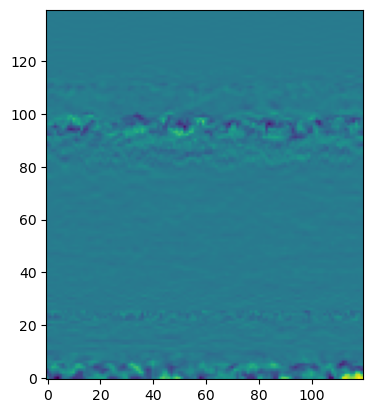

In [11]:
# this plots the horizontal velocity for a specific time (z vs. x)
plt.imshow(nc['vinterp'][24,:,60,:],origin='lower')

## Superdroplet trajectory files
These text files include the position and attributes of individual superdroplets. When the large eddy simulation is run, the calculations for individual superdroplets are distributed across different processors for computational efficiency. To load all the superdroplets at a single model time step, we need to load all of the text files that are at the same time step. The naming convention for the files (e.g. "SD_output_ASCII_05430.pe000245") includes the time step (in this case time_step =5430) and the processor the superdroplets were processed on (in this case, the processor = 245). 

In [12]:
# filepaths for trajectories
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/SDM_trajs/'
# this command lists all the files in the directory
trajfiles = os.listdir(dirpath)

In [13]:
# this is the file path for the first trajectory file in the directory
filepath = os.path.join(dirpath,trajfiles[0])

In [14]:
filepath

'/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_time_var_sgs_1024_poly_trj/SDM_trajs/SD_output_ASCII_05280.pe000020'

In [15]:
# these are the column names for the data in the ascii files
cols ={0:'x[m]',1:'y[m]',2:'z[m]',3:'vz[m]',
       4:'radius(droplet)[m]',5:'mass_of_aerosol_in_droplet/ice(1:01)[g]',6:'radius_eq(ice)[m]',7:'radius_pol(ice)[m]',
       8:'density(droplet/ice)[kg/m3]',9:'rhod [kg/m3]',10:'multiplicity[-]',11:'status[-]',12:'index', 13:'rime_mass[kg]',14:'num_of_monomers[-]',15:'rk_deact'}

colnames =['x[m]','y[m]','z[m]','vz[m]','radius(droplet)[m]','mass_of_aerosol_in_droplet/ice(1:01)[g]','radius_eq(ice)[m]','radius_pol(ice)[m]',
           'density(droplet/ice)[kg/m3]','rhod [kg/m3]','multiplicity[-]','status[-]','index','rime_mass[kg]','num_of_monomers[-]','rk_deact']

In [16]:
# load the data for a single trajectory file using pandas
traj=pd.read_csv(filepath,sep = '\s+',skiprows=1,header=None,delim_whitespace=False,names=colnames,index_col='index')

In [17]:
traj.head()

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],rime_mass[kg],num_of_monomers[-],rk_deact
index,,,,,,,,,,,,,,,
304,10227.159,267.207020,9817.8229,0.0,0.0,4.603646e-13,0.000029,0.000029,443.01759,203.18,13565076480,ICE,0.0,1,35277104
707,10464.579,463.374830,9222.9961,0.0,0.0,3.962118e-14,0.000021,0.000021,460.94420,332.73,70467960832,ICE,0.0,1,77707083
737,10330.807,90.648202,9668.2532,0.0,0.0,3.453011e-14,0.000025,0.000025,465.52915,496.82,72555749376,ICE,0.0,1,35277537
1077,10468.836,355.238080,9630.9639,0.0,0.0,1.333735e-14,0.000025,0.000025,449.62187,341.36,73889251328,ICE,0.0,1,35277877
1922,10250.350,302.214770,9642.4682,0.0,0.0,5.103863e-13,0.000048,0.000048,438.78979,151.36,12078625792,ICE,0.0,1,35278722


In [18]:
timestamps = []
processors = []
filelen = []
filenames = []

for file in trajfiles:
    if len(file)>29:
        filelen.append(len(file))
        filenames.append(file)
        timestamps.append(int(file[16:21]))
        processors.append(int(file[24:]))

Text(0.5, 0, 'Time stamp')

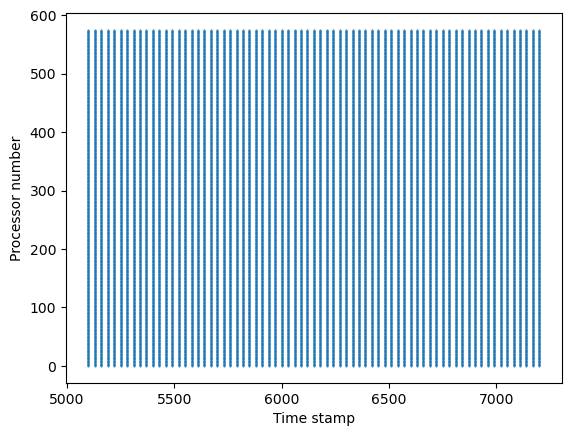

In [21]:
plt.scatter(timestamps,processors,s=0.2)
plt.ylabel("Processor number")
plt.xlabel("Time stamp")

In [22]:
times = np.unique(timestamps)

In [23]:
# these are the timestamps we have saved information about the location and attributes of each superdroplet (in seconds)
print(times)

[5100 5130 5160 5190 5220 5250 5280 5310 5340 5370 5400 5430 5460 5490
 5520 5550 5580 5610 5640 5670 5700 5730 5760 5790 5820 5850 5880 5910
 5940 5970 6000 6030 6060 6090 6120 6150 6180 6210 6240 6270 6300 6330
 6360 6390 6420 6450 6480 6510 6540 6570 6600 6630 6660 6690 6720 6750
 6780 6810 6840 6870 6900 6930 6960 6990 7020 7050 7080 7110 7140 7170
 7200]


In [27]:
# these are the times in the 3D environmental variable file (note the environmental variables are recorded at a different frequency than the superdroplet data)
nc['time']/1e9

<xarray.DataArray 'time' (time: 41)>
array([5160, 5220, 5280, 5340, 5400, 5460, 5160, 5220, 5280, 5340, 5400,
       5460, 5520, 5580, 5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060,
       6120, 6180, 6240, 6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720,
       6780, 6840, 6900, 6960, 7020, 7080, 7140, 7200],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:00:00.000488281

## Load all the trajectory data for a single time step

In [28]:
# for a specific time, load in all the superdroplet data
idx0 = np.where(timestamps==times[0])

In [29]:
fn0 = [filenames[idx0[0][i]] for i in range(0,len(idx0[0]))]

In [30]:
# this goes through all the files at the first time step, loads the trajectory data, concatenates it to the pandas dataframe
i = 0
for fn in fn0: 
    filepath = os.path.join(dirpath,fn)
    traj=pd.read_csv(filepath,sep = '\s+',skiprows=1,header=None,delim_whitespace=False,names=colnames,index_col='rk_deact')
    if i == 0:
        trajs = traj
    else:
        trajs = pd.concat([trajs,traj])
    i = i+1
        

In [32]:
# this is the total number of superdroplets at this time step
print(len(trajs))

1573432


In [33]:
traj0 = trajs.sort_index()

In [34]:
# this drops some unnecessary columns from the dataframe
colnames =['x[m]','y[m]','z[m]','vz[m]','radius(droplet)[m]','radius_eq(ice)[m]','radius_pol(ice)[m]',
           'density(droplet/ice)[kg/m3]','status[-]','index','rime_mass[kg]','num_of_monomers[-]','rk_deact']
dropcols = ['vz[m]','radius(droplet)[m]','status[-]','index','rime_mass[kg]','num_of_monomers[-]']

traj0 = traj0.drop(columns = dropcols)

In [35]:
traj0 = traj0.reset_index()

In [36]:
traj0.head()

,rk_deact,x[m],y[m],z[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-]
0,345,473.12640,474.646910,9500.5181,1.696665e-14,0.000013,0.000013,447.15654,289.55,75815124992
1,514,410.95111,241.540830,9719.1948,4.244163e-14,0.000023,0.000023,464.61306,263.64,69272150016
2,872,258.41102,331.613820,9533.4725,1.622385e-13,0.000009,0.000009,494.52613,375.91,35479605248
3,962,466.02906,450.631740,9662.1907,8.539189e-14,0.000008,0.000008,455.89723,194.55,52921167872
4,1107,169.25433,20.785657,9577.0813,4.147985e-14,0.000027,0.000027,473.55919,401.82,69681471488


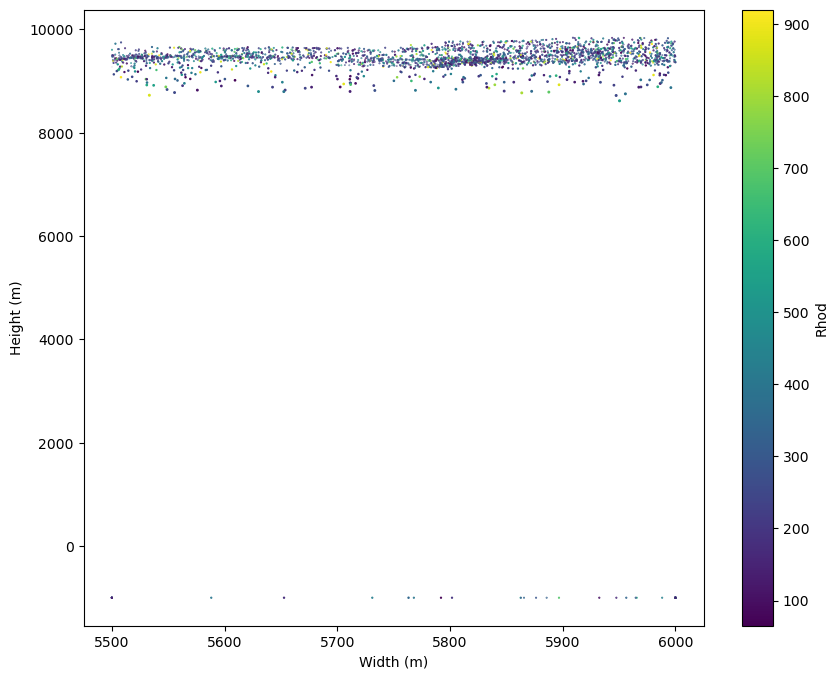

In [44]:
xs = traj['x[m]'].values
ys = traj['y[m]'].values
zs = traj['z[m]'].values
rads = 1e4*traj['radius_eq(ice)[m]'].values
rhod = traj['rhod [kg/m3]'].values

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(xs,zs,s=rads,c=rhod)
plt.ylabel("Height (m)")
plt.xlabel("Width (m)")
plt.colorbar(label="Rhod")